In [ ]:
<a name="Exploratotary-Data-Analysis"></a>[abc](#Exploratotary-Data-Analysis) 



# Problem Statement



* CUTe-3 : The given data contains details of various markers and financial ratios of entities. Target variable is whether the company got bankrupt in the subsequent years or not.
* 1 – bankrupt, 0 - not bankrupt
* Using the data build appropriate model to ascertain the bankruptcy of entity.

# Data Dictionary


* Attr1: net profit / total assets 
* Attr2: total liabilities / total assets 
* Attr3: working capital / total assets 
* Attr4: current assets / short-term liabilities 
* Attr5: [(cash + short-term securities + receivables - short-term * liabilities) / (operating expenses - depreciation)] * 365 
* Attr6: retained earnings / total assets 
* Attr7:	EBIT / total assets 
* Attr8:	book value of equity / total liabilities 
* Attr9:	sales / total assets 
* Attr10:	equity / total assets 
* Attr11:	(gross profit + extraordinary items + financial expenses) / total assets 
* Attr12:	gross profit / short-term liabilities 
* Attr13:	(gross profit + depreciation) / sales 
* Attr14:	(gross profit + interest) / total assets 
* Attr15:	(total liabilities * 365) / (gross profit + depreciation) 
* Attr16:	(gross profit + depreciation) / total liabilities 
* Attr17:	total assets / total liabilities 
* Attr18:	gross profit / total assets 
* Attr19:	gross profit / sales 
* Attr20:	(inventory * 365) / sales 
* Attr21:	sales (n) / sales (n-1) 
* Attr22:	profit on operating activities / total assets 
* Attr23:	net profit / sales 
* Attr24:	gross profit (in 3 years) / total assets 
* Attr25:	(equity - share capital) / total assets 
* Attr26:	(net profit + depreciation) / total liabilities 
* Attr27:	profit on operating activities / financial expenses 
* Attr28:	working capital / fixed assets 
* Attr29:	logarithm of total assets 
* Attr30:	(total liabilities - cash) / sales 
* Attr31:	(gross profit + interest) / sales 
* Attr32:	(current liabilities * 365) / cost of products sold 
* Attr33:	operating expenses / short-term liabilities 
* Attr34:	operating expenses / total liabilities 
* Attr35:	profit on sales / total assets 
* Attr36:	total sales / total assets 
* Attr37:	(current assets - inventories) / long-term liabilities 
* Attr38:	constant capital / total assets 
* Attr39:	profit on sales / sales 
* Attr40:	(current assets - inventory - receivables) / short-term liabilities 
* Attr41:	total liabilities / ((profit on operating activities + depreciation) * (12/365)) 
* Attr42:	profit on operating activities / sales 
* Attr43:	rotation receivables + inventory turnover in days 
* Attr44:	(receivables * 365) / sales 
* Attr45:	net profit / inventory 
* Attr46:	(current assets - inventory) / short-term liabilities 
* Attr47:	(inventory * 365) / cost of products sold 
* Attr48:	EBITDA (profit on operating activities - depreciation) / total assets 
* Attr49:	EBITDA (profit on operating activities - depreciation) / sales 
* Attr50:	current assets / total liabilities 
* Attr51:	short-term liabilities / total assets 
* Attr52:	(short-term liabilities * 365) / cost of products sold) 
* Attr53:	equity / fixed assets 
* Attr54:	constant capital / fixed assets 
* Attr55:	working capital 
* Attr56:	(sales - cost of products sold) / sales 
* Attr57:	(current assets - inventory - short-term liabilities) / (sales - gross profit - depreciation) 
* Attr58:	total costs /total sales 
* Attr59:	long-term liabilities / equity 
* Attr60:	sales / inventory 
* Attr61:	sales / receivables 
* Attr62:	(short-term liabilities *365) / sales 
* Attr63:	sales / short-term liabilities 
* Attr64:	sales / fixed assets

# Coding

## Basic Initializations

## Import Libraries

In [1]:
# To supress warnings
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Basic Libraries for Data organization, Statistical operations and Plottingimport pandas as pd
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns


import sklearn
from sklearn import linear_model
from sklearn import datasets
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 

# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve


## Get Working Directory

In [2]:
import os
os.getcwd()

'/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 3'

## Set Current Directory And Read csv File

* Reading the data into dataframes.

In [3]:
os.chdir("/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 3")
Train_Bankrupts = pd.read_csv("train.csv") # Train Dataset
Test_Bankrupts = pd.read_csv("test.csv") # Train Dataset

## Understanding The Dataset

In [5]:
print(type(Train_Bankrupts))

<class 'pandas.core.frame.DataFrame'>


In [6]:
print(Train_Bankrupts.shape)

(31283, 66)


* Train Data has  31283  rows and  66  columns.  

### Structure of Dataset

* Check the datatype and structure of train data
* 64 columns datatypes are float
* 2 columns datatypes are integer

In [7]:
Train_Bankrupts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31283 entries, 0 to 31282
Data columns (total 66 columns):
ID        31283 non-null int64
Attr1     31276 non-null float64
Attr2     31276 non-null float64
Attr3     31276 non-null float64
Attr4     31181 non-null float64
Attr5     31220 non-null float64
Attr6     31276 non-null float64
Attr7     31276 non-null float64
Attr8     31210 non-null float64
Attr9     31279 non-null float64
Attr10    31276 non-null float64
Attr11    31251 non-null float64
Attr12    31181 non-null float64
Attr13    31182 non-null float64
Attr14    31276 non-null float64
Attr15    31258 non-null float64
Attr16    31209 non-null float64
Attr17    31210 non-null float64
Attr18    31276 non-null float64
Attr19    31181 non-null float64
Attr20    31182 non-null float64
Attr21    27032 non-null float64
Attr22    31276 non-null float64
Attr23    31182 non-null float64
Attr24    30603 non-null float64
Attr25    31276 non-null float64
Attr26    31209 non-null float64
At

* summary of Train data

In [8]:
Train_Bankrupts.describe()

ID         Attr1         Attr2         Attr3         Attr4  \
count  31283.000000  31276.000000  31276.000000  31276.000000  31181.000000   
mean   15642.000000      0.051612      0.551159      0.151249      7.321993   
std     9030.768572      1.748230      4.510523      3.754494    347.736044   
min        1.000000   -256.890000   -430.870000   -479.730000     -0.045319   
25%     7821.500000      0.003360      0.269397      0.022146      1.051000   
50%    15642.000000      0.049686      0.472685      0.196770      1.571000   
75%    23462.500000      0.130523      0.689240      0.403983      2.797800   
max    31283.000000     94.280000    480.730000     28.336000  53433.000000   

              Attr5         Attr6         Attr7         Attr8         Attr9  \
count  3.122000e+04  31276.000000  31276.000000  31210.000000  31279.000000   
mean  -1.706215e+02     -0.011735      0.120577     14.379693      2.783840   
std    2.392279e+04      5.489446      6.045041    562.011982     69.973455   
min   -2.722100e+06   -508.120000   -517.480000    -15.236000     -3.496000   
25%   -4.845300e+01      0.000000      0.005758      0.428970      1.018100   
50%   -7.813950e-01      0.000000      0.059707      1.068650      1.196700   
75%    5.076850e+01      0.087633      0.151895      2.606850      2.060550   
max    1.034100e+06    543.250000    649.230000  53432.000000   9742.300000   

           ...             Attr56        Attr57        Attr58        Attr59  \
count      ...       3.118200e+04  31277.000000  3.121500e+04  31277.000000   
mean       ...      -3.637422e+01     -0.007774  4.067219e+01      1.677983   
std        ...       6.276744e+03     13.989982  6.283661e+03    143.470467   
min        ...      -1.108300e+06  -1667.300000 -1.986900e+02   -327.970000   
25%        ...       8.919150e-03      0.014690  8.751350e-01      0.000000   
50%        ...       5.306150e-02      0.120460  9.507600e-01      0.005453   
75%        ...       1.294750e-01      0.286740  9.927900e-01      0.234840   
max        ...       1.120200e+02    552.640000  1.108300e+06  23853.000000   

             Attr60        Attr61        Attr62        Attr63         Attr64  \
count  2.971300e+04  31210.000000  3.118200e+04  31181.000000   30682.000000   
mean   5.462892e+02     15.227988  1.640595e+03      9.656775      81.529420   
std    3.792399e+04    219.335078  1.515043e+05    142.374215    2726.762529   
min   -1.244000e+01     -6.590300 -1.496500e+04     -0.367890      -3.726500   
25%    5.533000e+00      4.523400  4.205425e+01      3.099200       2.180375   
50%    9.763000e+00      6.652750  7.120750e+01      5.090700       4.289950   
75%    2.014500e+01     10.417750  1.170400e+02      8.618600       9.788950   
max    4.818700e+06  26862.000000  2.501600e+07  23454.000000  294770.000000   

             target  
count  31283.000000  
mean       0.048301  
std        0.214405  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 66 columns]

In [4]:
Train_Bankrupts.head()

ID     Attr1    Attr2    Attr3   Attr4     Attr5    Attr6     Attr7  \
0   1  0.135370  0.45185  0.31162  2.0469   10.2340  0.16768  0.167630   
1   2  0.005861  0.39858  0.19768  1.9390    9.5771  0.00000  0.007237   
2   3  0.110600  0.16117  0.47894  7.5711  263.9000  0.00000  0.138360   
3   4  0.063911  1.40730 -0.29595  0.5291  -46.2870 -0.71420  0.079071   
4   5  0.131680  0.66031  0.44121  2.7098  -23.5960 -0.20007  0.131910   

     Attr8    Attr9   ...      Attr56   Attr57   Attr58   Attr59   Attr60  \
0  1.21310  2.25540   ...    0.078728  0.24695  0.92586  0.18362   9.0895   
1  1.50890  0.97880   ...    0.269720  0.00000  0.79303  0.31271   6.2213   
2  5.20450  0.68447   ...    0.159870  0.13185  0.80748  0.10234   9.4499   
3 -0.33076  0.98490   ...   -0.015327 -0.13730  1.01530 -1.67320  29.2710   
4  0.51445  2.13570   ...    0.110170  0.38764  0.93881  1.18420   4.5462   

    Attr61  Attr62  Attr63  Attr64  target  
0   8.8342  48.172  7.5770  5.7725       0  
1   4.2785  78.499  4.6497  1.6539       0  
2   3.3443  38.867  9.3910  1.5272       0  
3  14.1410  73.458  4.9688  4.6785       0  
4  15.1400  44.101  8.2764  7.1014       0  

[5 rows x 66 columns]

In [10]:
Train_Bankrupts.tail()

ID     Attr1     Attr2     Attr3    Attr4    Attr5     Attr6  \
31278  31279  0.267320  0.407240  0.407810   2.0014   54.282  0.267320   
31279  31280  0.022768  0.031973  0.903510  29.2590  266.830  0.000000   
31280  31281  0.100200  0.529230  0.091546   1.1998  -14.525  0.000000   
31281  31282 -0.079765  0.153710  0.694730   5.5198   63.382 -0.033106   
31282  31283  0.021070  0.287240  0.649310   3.2605   85.325  0.517390   

          Attr7     Attr8   Attr9   ...      Attr56    Attr57   Attr58  \
31278  0.343780   1.36560  1.1866   ...    0.157230  0.480690  0.84277   
31279  0.030024  30.27700  1.1493   ...    0.033169  0.023520  0.97386   
31280  0.100200   0.88953  2.7151   ...    0.007931  0.212850  0.96470   
31281 -0.082183   5.18020  1.0052   ...    0.005141 -0.100180  0.99486   
31282  0.032398   2.05410  1.0030   ...    0.002979  0.035712  0.99702   

       Attr59    Attr60   Attr61  Attr62   Attr63   Attr64  target  
31278     0.0  194.1900   4.5757  67.793   5.3840  11.8550       0  
31279     0.0   15.4430   6.1462  10.154  35.9450  17.8140       0  
31280     0.0   13.6860  10.8870  61.583   5.9270   6.0285       0  
31281     0.0    3.0071   9.6707  40.344   9.0472   9.1750       0  
31282     0.0  186.6700   5.7222  58.475   6.2420  28.2560       0  

[5 rows x 66 columns]

* All column names

In [11]:
print(Train_Bankrupts.columns) 


Index(['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63',
       'Attr64', 'target'],
      dtype='object')


## Data Pre-Processing 


* Checking the Column-wise Null Values


In [12]:
Train_Bankrupts.isnull().sum(axis=0)                                    

ID            0
Attr1         7
Attr2         7
Attr3         7
Attr4       102
Attr5        63
Attr6         7
Attr7         7
Attr8        73
Attr9         4
Attr10        7
Attr11       32
Attr12      102
Attr13      101
Attr14        7
Attr15       25
Attr16       74
Attr17       73
Attr18        7
Attr19      102
Attr20      101
Attr21     4251
Attr22        7
Attr23      101
Attr24      680
Attr25        7
Attr26       74
Attr27     2004
Attr28      601
Attr29        7
          ...  
Attr36        7
Attr37    13768
Attr38        7
Attr39      101
Attr40      102
Attr41      539
Attr42      101
Attr43      101
Attr44      101
Attr45     1566
Attr46      102
Attr47      207
Attr48        8
Attr49      101
Attr50       73
Attr51        7
Attr52      212
Attr53      601
Attr54      601
Attr55        0
Attr56      101
Attr57        6
Attr58       68
Attr59        6
Attr60     1570
Attr61       73
Attr62      101
Attr63      102
Attr64      601
target        0
Length: 66, dtype: int64

* Checking the Column-wise without Null Values



In [13]:
Train_Bankrupts.apply(lambda y: y.count(), axis=0)



ID        31283
Attr1     31276
Attr2     31276
Attr3     31276
Attr4     31181
Attr5     31220
Attr6     31276
Attr7     31276
Attr8     31210
Attr9     31279
Attr10    31276
Attr11    31251
Attr12    31181
Attr13    31182
Attr14    31276
Attr15    31258
Attr16    31209
Attr17    31210
Attr18    31276
Attr19    31181
Attr20    31182
Attr21    27032
Attr22    31276
Attr23    31182
Attr24    30603
Attr25    31276
Attr26    31209
Attr27    29279
Attr28    30682
Attr29    31276
          ...  
Attr36    31276
Attr37    17515
Attr38    31276
Attr39    31182
Attr40    31181
Attr41    30744
Attr42    31182
Attr43    31182
Attr44    31182
Attr45    29717
Attr46    31181
Attr47    31076
Attr48    31275
Attr49    31182
Attr50    31210
Attr51    31276
Attr52    31071
Attr53    30682
Attr54    30682
Attr55    31283
Attr56    31182
Attr57    31277
Attr58    31215
Attr59    31277
Attr60    29713
Attr61    31210
Attr62    31182
Attr63    31181
Attr64    30682
target    31283
Length: 66, dtype: int64

* Checking the row-wise without Null Values


In [14]:
Train_Bankrupts.apply(lambda x: x.count(), axis=1)


0        65
1        66
2        66
3        66
4        66
5        65
6        65
7        64
8        65
9        65
10       66
11       66
12       66
13       65
14       65
15       66
16       66
17       66
18       66
19       63
20       66
21       66
22       61
23       65
24       66
25       65
26       61
27       65
28       66
29       65
         ..
31253    65
31254    66
31255    65
31256    66
31257    65
31258    66
31259    65
31260    66
31261    66
31262    63
31263    65
31264    65
31265    65
31266    65
31267    66
31268    65
31269    65
31270    64
31271    66
31272    66
31273    61
31274    65
31275    65
31276    65
31277    65
31278    64
31279    64
31280    65
31281    65
31282    65
Length: 31283, dtype: int64

* Checking the row-wise Null Values

In [15]:
Train_Bankrupts.isnull().sum(axis=1)                                    


0        1
1        0
2        0
3        0
4        0
5        1
6        1
7        2
8        1
9        1
10       0
11       0
12       0
13       1
14       1
15       0
16       0
17       0
18       0
19       3
20       0
21       0
22       5
23       1
24       0
25       1
26       5
27       1
28       0
29       1
        ..
31253    1
31254    0
31255    1
31256    0
31257    1
31258    0
31259    1
31260    0
31261    0
31262    3
31263    1
31264    1
31265    1
31266    1
31267    0
31268    1
31269    1
31270    2
31271    0
31272    0
31273    5
31274    1
31275    1
31276    1
31277    1
31278    2
31279    2
31280    1
31281    1
31282    1
Length: 31283, dtype: int64

* All total of rows and columns missing values in Train_Bankrupts Dataset is 30216

In [16]:
Train_Bankrupts.isnull().sum().sum()

30216

In [17]:
columns = Train_Bankrupts.columns
percent_missing = Train_Bankrupts.isnull().sum() * 100 / len(Train_Bankrupts)
missing_value_Train_Bankrupts = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_Train_Bankrupts.sort_values('percent_missing', inplace=True)
#percent_missing1 = Train_Bankrupts.isnull().sum() * 100 / len(Train_Bankrupts)


In [18]:
print(percent_missing)

ID         0.000000
Attr1      0.022376
Attr2      0.022376
Attr3      0.022376
Attr4      0.326056
Attr5      0.201387
Attr6      0.022376
Attr7      0.022376
Attr8      0.233354
Attr9      0.012786
Attr10     0.022376
Attr11     0.102292
Attr12     0.326056
Attr13     0.322859
Attr14     0.022376
Attr15     0.079916
Attr16     0.236550
Attr17     0.233354
Attr18     0.022376
Attr19     0.326056
Attr20     0.322859
Attr21    13.588850
Attr22     0.022376
Attr23     0.322859
Attr24     2.173705
Attr25     0.022376
Attr26     0.236550
Attr27     6.406035
Attr28     1.921171
Attr29     0.022376
            ...    
Attr36     0.022376
Attr37    44.011124
Attr38     0.022376
Attr39     0.322859
Attr40     0.326056
Attr41     1.722981
Attr42     0.322859
Attr43     0.322859
Attr44     0.322859
Attr45     5.005914
Attr46     0.326056
Attr47     0.661701
Attr48     0.025573
Attr49     0.322859
Attr50     0.233354
Attr51     0.022376
Attr52     0.677684
Attr53     1.921171
Attr54     1.921171


### Displaying the frequency chart for output variable (target = bankruptcy status)


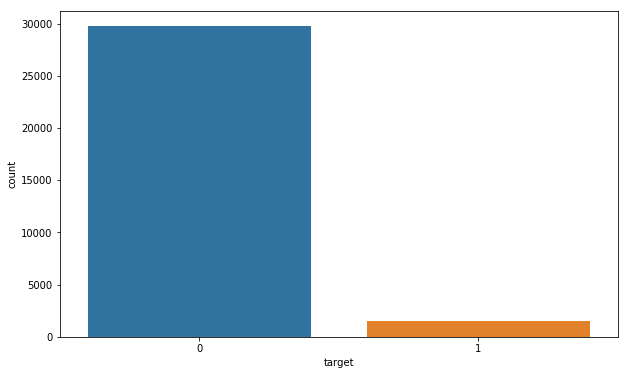

In [8]:
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = Train_Bankrupts)

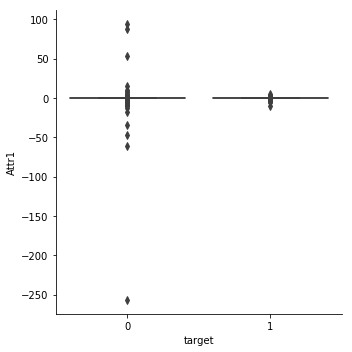

In [151]:
sns.catplot(x="target", y="Attr1", kind="box", data=Train_Bankrupts)

Text(0,0.5,'counts')

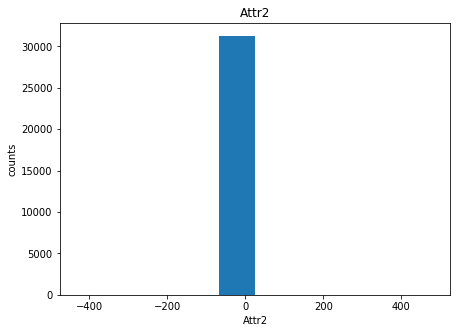

In [164]:
fig = plt.figure(figsize=(7, 5))
Train_Bankrupts['Attr2'].plot(kind='hist', title='Attr2 distribution')
# Add labels
plt.title('Attr2')
plt.xlabel('Attr2')
plt.ylabel('counts')

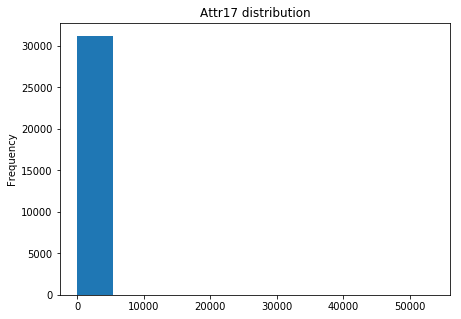

In [157]:
fig = plt.figure(figsize=(7, 5))
Train_Bankrupts['Attr17'].plot(kind='hist', title='Attr17 distribution')


Text(0,0.5,'Density')

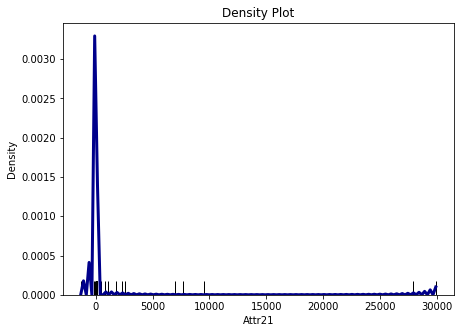

In [176]:
fig = plt.figure(figsize=(7, 5))

sns.distplot(Train_Bankrupts['Attr21'], hist = False, kde = True, rug = True,
             color = 'darkblue', 
             kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot')
plt.xlabel('Attr21')
plt.ylabel('Density')


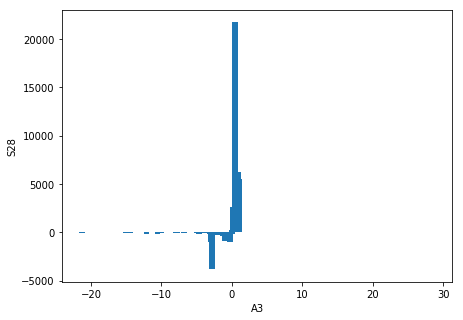

In [4]:
fig = plt.figure(figsize=(7, 5))
# plot between 2 attributes 
plt.bar(Train_Bankrupts['Attr3'], Train_Bankrupts['Attr28']) 
plt.xlabel("A3") 
plt.ylabel("S28") 
plt.show()

<Figure size 1440x1080 with 0 Axes>

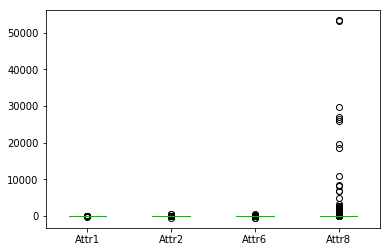

In [11]:
fig = plt.figure(figsize=(20, 15))
cp = pd.DataFrame(Train_Bankrupts, columns = ['Attr1','Attr2','Attr6','Attr8'])
cp.plot.box() 



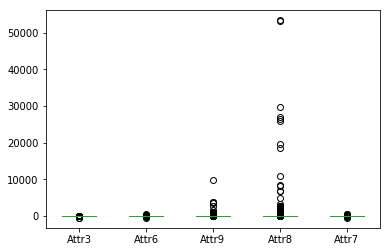

In [12]:
box_AZscore = pd.DataFrame(Train_Bankrupts, columns = ['Attr3','Attr6','Attr9','Attr8','Attr7'])
box_AZscore.plot.box()
plt.show() 

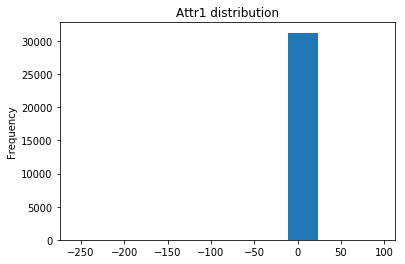

In [32]:
Train_Bankrupts['Attr1'].plot(kind='hist', title='Attr1 distribution')



<Figure size 504x360 with 0 Axes>

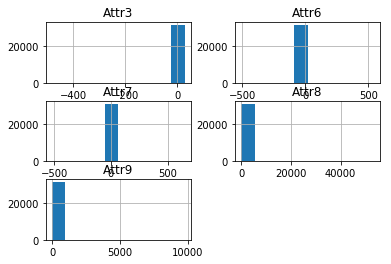

In [16]:
fig = plt.figure(figsize=(7, 5))
box_AZscore.hist()
plt.show() 

### Important Variable

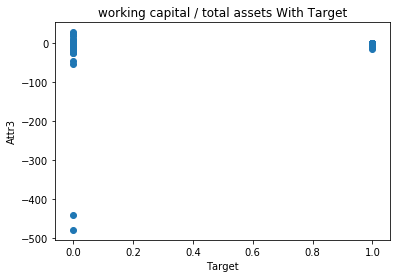

In [19]:
plt.scatter(Train_Bankrupts['target'], Train_Bankrupts['Attr3']) 
plt.xlabel("Target") 
plt.ylabel("Attr3")
plt.title("1) working capital / total assets With Target") 
plt.show()
plt.show()

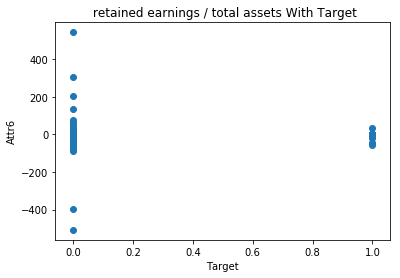

In [20]:
plt.scatter(Train_Bankrupts['target'], Train_Bankrupts['Attr6']) 
plt.xlabel("Target") 
plt.ylabel("Attr6") 
plt.title("2) retained earnings / total assets With Target") 
plt.show()
plt.show()

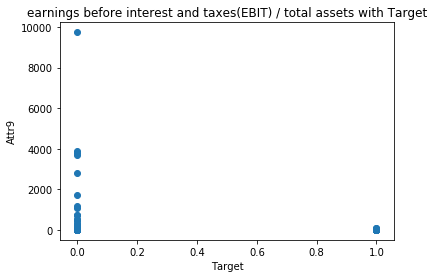

In [21]:
plt.scatter(Train_Bankrupts['target'], Train_Bankrupts['Attr9']) 
plt.xlabel("Target") 
plt.ylabel("Attr9") 
plt.title("3 )earnings before interest and taxes(EBIT) / total assets with Target") 
plt.show()


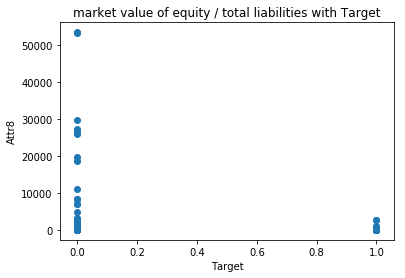

In [22]:
plt.scatter(Train_Bankrupts['target'], Train_Bankrupts['Attr8']) 
plt.xlabel("Target") 
plt.ylabel("Attr8") 
plt.title(" 4)market value of equity / total liabilities with Target") 
plt.show()

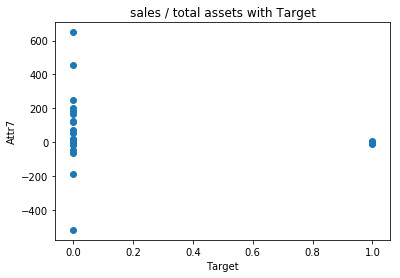

In [23]:
plt.scatter(Train_Bankrupts['target'], Train_Bankrupts['Attr7']) 
plt.xlabel("Target") 
plt.ylabel("Attr7") 
plt.title("5) sales / total assets with Target") 
plt.show()

# Feature Engineering

In [4]:
Train_Bankrupts.drop(['Attr5','Attr17','Attr21','Attr28','Attr37'],axis=1, inplace = True)



## Impute Missing Values

* Pandas provides the fillna() function for replacing missing values with a specific value.
* I am used fillna() to replace missing values with the mean value for each column, as follows:

In [5]:
Train_Bankrupts.fillna(Train_Bankrupts.mean(), inplace=True)
Train_Bankrupts.isnull().sum().sum()



0

# Understand test data

In [85]:
print(type(Test_Bankrupts))

<class 'pandas.core.frame.DataFrame'>


In [86]:
print(Test_Bankrupts.shape)

(6451, 65)


In [87]:
Test_Bankrupts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6451 entries, 0 to 6450
Data columns (total 65 columns):
ID        6451 non-null int64
Attr1     6451 non-null float64
Attr2     6451 non-null float64
Attr3     6451 non-null float64
Attr4     6429 non-null float64
Attr5     6438 non-null float64
Attr6     6451 non-null float64
Attr7     6451 non-null float64
Attr8     6437 non-null float64
Attr9     6449 non-null float64
Attr10    6451 non-null float64
Attr11    6444 non-null float64
Attr12    6429 non-null float64
Attr13    6439 non-null float64
Attr14    6451 non-null float64
Attr15    6443 non-null float64
Attr16    6437 non-null float64
Attr17    6437 non-null float64
Attr18    6451 non-null float64
Attr19    6439 non-null float64
Attr20    6439 non-null float64
Attr21    5598 non-null float64
Attr22    6451 non-null float64
Attr23    6439 non-null float64
Attr24    6323 non-null float64
Attr25    6451 non-null float64
Attr26    6437 non-null float64
Attr27    6044 non-null float64

In [88]:
Test_Bankrupts.describe()

ID        Attr1        Attr2        Attr3        Attr4  \
count   6451.000000  6451.000000  6451.000000  6451.000000  6429.000000   
mean   39779.000000    -0.019729     0.671916     0.035850     3.540007   
std     1862.387625     5.853072     7.881294     7.877168    20.957010   
min    36554.000000  -463.890000     0.000000  -445.910000    -0.403110   
25%    38166.500000     0.003772     0.271310     0.017369     1.038700   
50%    39779.000000     0.050048     0.471450     0.194430     1.558600   
75%    41391.500000     0.127275     0.687835     0.395880     2.737500   
max    43004.000000    20.482000   446.910000    17.708000  1017.800000   

              Attr5        Attr6        Attr7         Attr8        Attr9  \
count  6.438000e+03  6451.000000  6451.000000   6437.000000  6449.000000   
mean   1.585019e+02    -0.208878     0.000546      7.062295     2.007925   
std    2.054143e+04    10.400030     5.873490    230.439886    21.260431   
min   -6.341400e+05  -486.820000  -463.890000     -3.735100    -0.612590   
25%   -4.988150e+01     0.000000     0.005991      0.427480     1.019700   
50%   -1.428250e+00     0.000000     0.059782      1.058700     1.192800   
75%    4.848250e+01     0.093908     0.147620      2.589000     2.104000   
max    1.250100e+06   244.310000    38.618000  18148.000000  1704.800000   

           ...             Attr55       Attr56       Attr57        Attr58  \
count      ...       6.450000e+03  6439.000000  6451.000000   6445.000000   
mean       ...       6.088847e+03     0.023130     0.034450      3.932018   
std        ...       4.220430e+04     7.049784     8.066195    197.802787   
min        ...      -4.928300e+05  -477.080000  -469.050000     -1.632400   
25%        ...       1.958850e+01     0.009892     0.015050      0.878160   
50%        ...       1.098150e+03     0.052082     0.117930      0.951960   
75%        ...       4.880725e+03     0.124810     0.282195      0.992470   
max        ...       1.634200e+06   293.150000   147.190000  15459.000000   

            Attr59         Attr60       Attr61        Attr62       Attr63  \
count  6451.000000    6146.000000  6436.000000  6.439000e+03  6429.000000   
mean      0.530441     283.327769    13.902278 -4.418735e+01     9.092290   
std      21.750395    8061.380944   107.694529  3.018073e+04    72.770389   
min    -152.090000       0.000000    -0.014534 -2.336500e+06    -1.543200   
25%       0.000000       5.680450     4.549600  4.182800e+01     3.109900   
50%       0.009292      10.058000     6.719050  7.049000e+01     5.145700   
75%       0.249175      20.720250    10.660000  1.168050e+02     8.633600   
max    1661.000000  457320.000000  7123.000000  4.513800e+05  5662.400000   

             Attr64  
count   6341.000000  
mean      46.106849  
std      742.918601  
min   -10677.000000  
25%        2.166400  
50%        4.297500  
75%       10.024000  
max    28999.000000  

[8 rows x 65 columns]

In [89]:
Test_Bankrupts.head()

ID     Attr1    Attr2     Attr3    Attr4   Attr5     Attr6     Attr7  \
0  36554  0.200550  0.37951  0.396410  2.04720  32.351  0.388250  0.249760   
1  36555  0.009020  0.63202  0.053735  1.12630 -37.842  0.000000  0.014434   
2  36556  0.124080  0.83837  0.142040  1.16940 -91.883  0.000000  0.153280   
3  36557  0.203930  0.56037  0.134950  1.24080   3.158  0.000000  0.242910   
4  36558 -0.054623  0.92857 -0.026927  0.94263 -87.724 -0.054623 -0.054623   

      Attr8    Attr9    ...          Attr55    Attr56    Attr57   Attr58  \
0  1.330500  1.13890    ...     348690.0000  0.121960  0.397180  0.87804   
1  0.582230  1.33320    ...          1.1263  0.180110  0.024512  0.84165   
2  0.192790  2.11560    ...        989.4100  0.079665  0.767680  0.92847   
3  0.784520  2.27060    ...        711.8500  0.107700  0.463860  0.89419   
4  0.074796  0.92301    ...      -1693.2000 -0.083417 -0.786480  1.08340   

     Attr59   Attr60   Attr61   Attr62  Attr63    Attr64  
0  0.001924   8.4160   5.1372   82.658  4.4158    7.4277  
1  0.340940   9.9665   4.2382  116.500  3.1330    2.5603  
2  0.000000   3.3192   6.4994  144.630  2.5236  107.6700  
3  0.000000  24.9790  10.7670   90.080  4.0519    7.4525  
4  6.611400   4.7055   3.1662  226.760  1.6096    1.3551  

[5 rows x 65 columns]

In [92]:
Test_Bankrupts.columns

Index(['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7',
       'Attr8', 'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14',
       'Attr15', 'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21',
       'Attr22', 'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28',
       'Attr29', 'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35',
       'Attr36', 'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42',
       'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49',
       'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56',
       'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63',
       'Attr64'],
      dtype='object')

In [93]:
Test_Bankrupts.isnull().sum().sum()

5850

In [28]:
Test_Bankrupts.drop(['Attr5','Attr17','Attr21','Attr28','Attr37'],axis=1, inplace = True)



In [92]:
Test_Bankrupts.columns

Index(['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr18', 'Attr19', 'Attr20', 'Attr22', 'Attr23', 'Attr24',
       'Attr25', 'Attr26', 'Attr27', 'Attr29', 'Attr30', 'Attr31', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38', 'Attr39', 'Attr40',
       'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47',
       'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54',
       'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61',
       'Attr62', 'Attr63', 'Attr64'],
      dtype='object')

In [123]:
Test_Bankrupts.head()

ID     Attr1    Attr2     Attr3    Attr4   Attr5     Attr6     Attr7  \
0  36554  0.200550  0.37951  0.396410  2.04720  32.351  0.388250  0.249760   
1  36555  0.009020  0.63202  0.053735  1.12630 -37.842  0.000000  0.014434   
2  36556  0.124080  0.83837  0.142040  1.16940 -91.883  0.000000  0.153280   
3  36557  0.203930  0.56037  0.134950  1.24080   3.158  0.000000  0.242910   
4  36558 -0.054623  0.92857 -0.026927  0.94263 -87.724 -0.054623 -0.054623   

      Attr8    Attr9    ...          Attr55    Attr56    Attr57   Attr58  \
0  1.330500  1.13890    ...     348690.0000  0.121960  0.397180  0.87804   
1  0.582230  1.33320    ...          1.1263  0.180110  0.024512  0.84165   
2  0.192790  2.11560    ...        989.4100  0.079665  0.767680  0.92847   
3  0.784520  2.27060    ...        711.8500  0.107700  0.463860  0.89419   
4  0.074796  0.92301    ...      -1693.2000 -0.083417 -0.786480  1.08340   

     Attr59   Attr60   Attr61   Attr62  Attr63    Attr64  
0  0.001924   8.4160   5.1372   82.658  4.4158    7.4277  
1  0.340940   9.9665   4.2382  116.500  3.1330    2.5603  
2  0.000000   3.3192   6.4994  144.630  2.5236  107.6700  
3  0.000000  24.9790  10.7670   90.080  4.0519    7.4525  
4  6.611400   4.7055   3.1662  226.760  1.6096    1.3551  

[5 rows x 62 columns]

In [6]:
Test_Bankrupts.fillna(Test_Bankrupts.mean(), inplace=True)
Test_Bankrupts.isnull().sum().sum()

0

# Feature level analysis

### Check for Correlation among all variables  

In [288]:
Train_Bankrupts.corr()

Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
Attr1   1.000000 -0.254073  0.117850  0.000301  0.015410  0.244123  0.081612   
Attr2  -0.254073  1.000000 -0.822203 -0.001917 -0.072394 -0.870259  0.193065   
Attr3   0.117850 -0.822203  1.000000  0.003317  0.087179  0.665321  0.039835   
Attr4   0.000301 -0.001917  0.003317  1.000000  0.005222 -0.000113  0.000085   
Attr5   0.015410 -0.072394  0.087179  0.005222  1.000000  0.056705  0.004517   
Attr6   0.244123 -0.870259  0.665321 -0.000113  0.056705  1.000000 -0.184944   
Attr7   0.081612  0.193065  0.039835  0.000085  0.004517 -0.184944  1.000000   
Attr8   0.000081 -0.002949  0.001835  0.624233  0.004661  0.000535 -0.000124   
Attr9  -0.218202 -0.028567 -0.002707 -0.000364  0.001432  0.029749  0.691278   
Attr10 -0.120803 -0.312220  0.242419  0.000580  0.021470  0.339445  0.345815   
Attr11  0.224035 -0.029155 -0.004008  0.000012 -0.000232  0.057750  0.881256   
Attr12  0.093047 -0.001403  0.001589  0.146879  0.001312  0.023674  0.096559   
Attr13  0.002572 -0.000163  0.000213  0.000190 -0.001447 -0.000137  0.000928   
Attr14  0.081612  0.193065  0.039835  0.000085  0.004517 -0.184944  1.000000   
Attr15 -0.000125  0.000825 -0.000804 -0.000436 -0.141621  0.000210 -0.000286   
Attr16  0.090460 -0.002021  0.001919  0.149692  0.001487  0.024062  0.098460   
Attr18  0.081374  0.192542  0.039707  0.000074  0.004507 -0.184435  0.997243   
Attr19  0.004751 -0.000801  0.000595  0.000401 -0.002524 -0.000201  0.001821   
Attr20 -0.000142  0.000349 -0.000048 -0.000047 -0.000008  0.000030 -0.000146   
Attr22  0.251367 -0.034188  0.002658 -0.000099  0.000154  0.000421  0.863752   
Attr23  0.004996 -0.001283  0.000562  0.000316 -0.001968  0.000345  0.001330   
Attr24  0.163616 -0.090633  0.064153 -0.000106  0.005861  0.187790  0.793287   
Attr25 -0.373395 -0.318366  0.331546  0.000634  0.029057  0.295216  0.072781   
Attr26  0.093298 -0.001890  0.001801  0.129181  0.001405  0.024794  0.033121   
Attr27  0.009752 -0.003245  0.003242  0.000167  0.000379  0.000124  0.006788   
Attr29  0.031705 -0.037613  0.032589 -0.020725  0.007899  0.036885 -0.036487   
Attr30 -0.000398  0.012666 -0.014690 -0.000279 -0.000967 -0.010263 -0.000203   
Attr31  0.004736 -0.000760  0.000543  0.000416 -0.002590 -0.000225  0.001816   
Attr32 -0.004724  0.018419 -0.022206 -0.000180 -0.008111 -0.014810 -0.001479   
Attr33  0.002461 -0.002676  0.004742  0.120910  0.001376 -0.000037  0.553902   
...          ...       ...       ...       ...       ...       ...       ...   
Attr35 -0.040590 -0.038668  0.002966 -0.000168  0.000162  0.004308  0.797584   
Attr36 -0.217675 -0.028518 -0.001895 -0.000420  0.000398  0.030196  0.692694   
Attr37  0.000268 -0.001224  0.000857  0.000142 -0.000036  0.000453 -0.000064   
Attr38 -0.107100 -0.334661  0.240208  0.000511  0.021365  0.362860  0.320699   
Attr39  0.001487 -0.001221  0.001418 -0.000231  0.000200  0.001503  0.000580   
Attr40  0.001232 -0.003078  0.005769  0.494404  0.005792 -0.000220  0.000705   
Attr41  0.000350 -0.000240  0.000384 -0.000105 -0.000716  0.000280  0.000028   
Attr42  0.004365 -0.001238  0.002067 -0.000713  0.002314  0.003010  0.001520   
Attr43 -0.000179  0.000467 -0.000142 -0.000016 -0.000368 -0.000084 -0.000144   
Attr44 -0.000192  0.000507 -0.000175 -0.000005 -0.000491 -0.000123 -0.000142   
Attr45  0.001355 -0.001314  0.001771  0.000533 -0.000238  0.000688  0.000424   
Attr46  0.000218 -0.001726  0.003115  0.999950  0.005195 -0.000211  0.000134   
Attr47 -0.001029  0.001209 -0.001385 -0.000148  0.000229 -0.001235 -0.000421   
Attr48  0.265722 -0.030807  0.002909  0.000067  0.000078 -0.026594  0.835529   
Attr49  0.001668 -0.000910  0.000801 -0.000194  0.000769  0.001042  0.000659   
Attr50  0.000385 -0.001994  0.003313  0.955057  0.005734 -0.000004  0.000066   
Attr51 -0.114969  0.820986 -0.995932 -0.002062 -0.087389 -0.663907 -0.043863   
Attr52 -0.001875  0.009884 -0.012502 -0.000181 -0.004346 -0.008282 -0.000647   
Attr53  0.0

In [23]:
import seaborn as sns

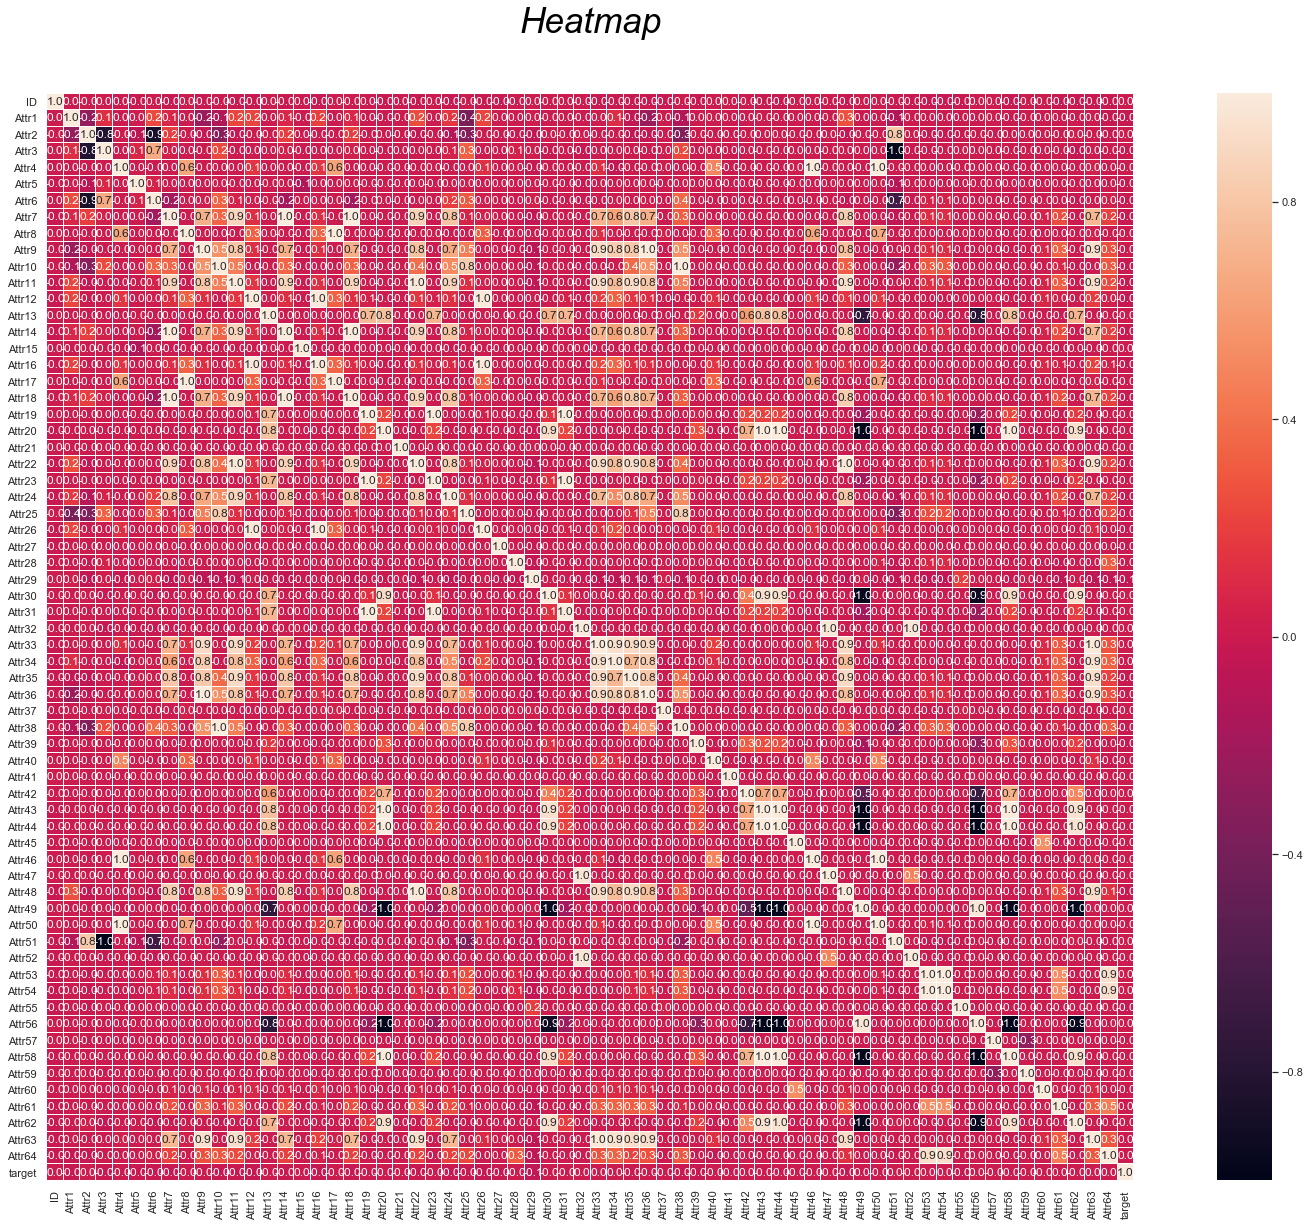

In [55]:
correlation_matrix = Train_Bankrupts.corr().round(2)
# annot = True to print the values inside the square
#plt.figure(figsize=(8, 8))  fmt="d"
plt.rcParams['font.size'] = 20
fig, ax = plt.subplots(figsize=(30,20))# Sample figsize in inchesTrue
#title for heatmap
title = "Heatmap"
plt.title(title, fontsize = 35,color='Black', fontstyle='italic')
ttl = ax.title
ttl.set_position([0.5, 1.05])
p=sns.heatmap(data=correlation_matrix, annot=True, fmt=".1f", linewidths=0.005, ax=ax, square=True, annot_kws={"size": 12})
plt.show()

In [52]:
p.get_figure().savefig('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 3/Figures/heatmap.png')


/Users/priyavivekbhandarkar/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


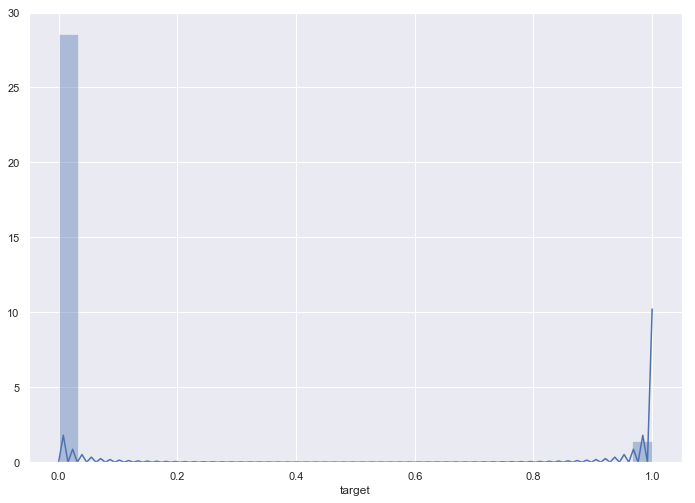

In [17]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(Train_Bankrupts['target'], bins=30)
plt.show()

## Dealing with imbalanced data¶


In [289]:
Train_Bankrupts['target'].value_counts()

0    29772
1     1511
Name: target, dtype: int64

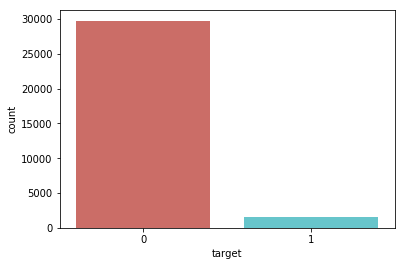

<Figure size 432x288 with 0 Axes>

In [290]:
t=sns.countplot(x="target",data=Train_Bankrupts,palette="hls")
plt.show()
plt.savefig("count_plot")
t.get_figure().savefig('/Users/priyavivekbhandarkar/Desktop/INSOFE/ALL MODULES INSOFE/CUTE 3/Figures/count_plot.png')



* Our classes are imbalanced, and the ratio of no-Bankrupts to Bankrupts instances is 95:5. 

In [291]:
count_no_Bankrupts = len(Train_Bankrupts[Train_Bankrupts['target']==0])
count_Bankrupts = len(Train_Bankrupts[Train_Bankrupts['target']==1])
pct_of_no_Bankrupts = count_no_Bankrupts/(count_no_Bankrupts+count_Bankrupts)
print("percentage of no Bankrupts is", pct_of_no_Bankrupts*100)
pct_of_Bankrupts = count_Bankrupts/(count_no_Bankrupts+count_Bankrupts)
print("percentage of Bankrupts", pct_of_Bankrupts*100)

percentage of no Bankrupts is 95.16990058498226
percentage of Bankrupts 4.830099415017742


In [292]:
Train_Bankrupts.groupby("target").mean()

Attr1     Attr2     Attr3     Attr4       Attr5     Attr6  \
target                                                                 
0       0.057963  0.536858  0.160799  7.487831 -139.213957  0.001484   
1      -0.073536  0.832950 -0.036920  4.054399 -789.460130 -0.272184   

           Attr7      Attr8     Attr9    Attr10     ...           Attr55  \
target                                              ...                    
0       0.129938  14.738350  2.826300  0.730156     ...      8473.758619   
1      -0.063867   7.312887  1.947223  0.193838     ...      1408.679813   

           Attr56    Attr57     Attr58    Attr59      Attr60     Attr61  \
target                                                                    
0      -37.951637  0.000622  42.674084  1.727327  565.404493  15.225656   
1       -5.293556 -0.173196   1.227911  0.705726  169.650489  15.273949   

             Attr62    Attr63      Attr64  
target                                     
0       1699.905234  9.653207   79.798601  
1        471.977365  9.727071  115.632644  

[2 rows x 61 columns]

### Target datatype Convert in categorical



In [8]:


Train_Bankrupts['target'] = Train_Bankrupts['target'].astype('category')
uniques = pd.factorize(Train_Bankrupts['target'])
print(uniques)


(array([0, 0, 0, ..., 0, 0, 0]), CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category'))


# Over-sampling using SMOTE


* With our training data created, I’ll up-sample the not-Bankrupts using the SMOTE algorithm(Synthetic Minority Oversampling Technique). At a high level, SMOTE:



* We are going to implement SMOTE in Python.

In [9]:
from sklearn.model_selection import train_test_split



In [10]:
X = np.array(Train_Bankrupts.ix[:, Train_Bankrupts.columns != 'target'])
y = np.array(Train_Bankrupts.ix[:, Train_Bankrupts.columns == 'target'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Shape of X: (31283, 60)
Shape of y: (31283, 1)
Number transactions X_train dataset:  (21898, 60)
Number transactions y_train dataset:  (21898, 1)
Number transactions X_test dataset:  (9385, 60)
Number transactions y_test dataset:  (9385, 1)


In [11]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': [1044]
Before OverSampling, counts of label '0': [20854] 

After OverSampling, the shape of train_X: (41708, 60)
After OverSampling, the shape of train_y: (41708,) 

After OverSampling, counts of label '1': 20854
After OverSampling, counts of label '0': 20854


### Data Normalization

In [12]:
from sklearn.preprocessing import Normalizer


In [13]:
Data_norm=Normalizer()
X_train_res=Data_norm.fit_transform(X_train_res)
X_test=Data_norm.transform(X_test)

# Data Modeling: Building Classification Models


# Implementing the model


* Target datatype Convert in categorical



In [35]:
Train_Bankrupts['target'] = Train_Bankrupts['target'].astype('category')


In [36]:

uniques = pd.factorize(Train_Bankrupts['target'])
print(uniques)

(array([0, 0, 0, ..., 0, 0, 0]), CategoricalIndex([0, 1], categories=[0, 1], ordered=False, dtype='category'))


# MODELS

## 1) Naive Bay's

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [45]:
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train_res, y_train_res)

GaussianNB(priors=None, var_smoothing=1e-09)

In [46]:
 nb_predicted = gnb_classifier.predict(X_test)

In [47]:

confusion_matrix = metrics.confusion_matrix(y_test, nb_predicted)
print(confusion_matrix)

[[ 431 8487]
 [  32  435]]


In [48]:
accuracy_score(y_test, nb_predicted)

0.09227490676611615

In [49]:
print(classification_report(y_test, nb_predicted))

              precision    recall  f1-score   support

           0       0.93      0.05      0.09      8918
           1       0.05      0.93      0.09       467

   micro avg       0.09      0.09      0.09      9385
   macro avg       0.49      0.49      0.09      9385
weighted avg       0.89      0.09      0.09      9385



## 2) AdaBoost

In [14]:
from sklearn.ensemble import AdaBoostClassifier


In [15]:
Adaboost_model = AdaBoostClassifier(n_estimators=100,
    learning_rate=1)


Adaboost_model.fit(X_train_res, y_train_res.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=100, random_state=None)

In [16]:
Ada_pred=Adaboost_model.predict(X_test)


In [19]:
confusion_matrix = metrics.confusion_matrix(y_test, Ada_pred)
print(confusion_matrix)

[[7369 1549]
 [ 175  292]]


In [20]:
accuracy_score(y_test, Ada_pred)

0.816302610548748

In [21]:
print(classification_report(y_test, Ada_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8918
           1       0.16      0.63      0.25       467

   micro avg       0.82      0.82      0.82      9385
   macro avg       0.57      0.73      0.57      9385
weighted avg       0.94      0.82      0.86      9385



In [316]:
svc=SVC(probability=True, kernel='linear')


In [317]:
 Create adaboost classifer object
Ada_svc =AdaBoostClassifier(n_estimators=50, base_estimator=svc,learning_rate=1)


In [ ]:
# Train Adaboost Classifer
model = Ada_svc.fit(X_train_res, y_train_res.ravel())


In [ ]:
#Predict the response for test dataset
Ada_svc_pred = model.predict(X_test)

In [ ]:
confusion_matrix = metrics.confusion_matrix(y_test, Ada_svc_pred)
print(confusion_matrix)

In [ ]:
accuracy_score(y_test, Ada_svc_pred)

In [ ]:
print(classification_report(y_test, Ada_svc_pred))

## 3) Bagging

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn import model_selection


In [66]:
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model_bag = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)


In [67]:
model_bag.fit(X_train_res, y_train_res.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [68]:
model_bag_pred = model_bag.predict(X_test)

In [70]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, model_bag_pred)
print(confusion_matrix)

[[8636  282]
 [ 238  229]]


In [71]:
accuracy_score(y_test, model_bag_pred)

0.9445924347362813

In [72]:
print(classification_report(y_test, model_bag_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      8918
           1       0.45      0.49      0.47       467

   micro avg       0.94      0.94      0.94      9385
   macro avg       0.71      0.73      0.72      9385
weighted avg       0.95      0.94      0.95      9385



## 4) Logistic Regression

In [73]:
#from sklearn.linear_model import LogisticRegression
#from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(os_data_X , os_data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res.ravel())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

* predict Logistic Regression

In [74]:
lod_pred_train = logreg.predict(X_test)


In [76]:
from sklearn.metrics import confusion_matrix


confusion_matrix = confusion_matrix(y_test, lod_pred_train )
print(confusion_matrix)

[[5468 3450]
 [ 143  324]]


In [77]:
from sklearn.metrics import accuracy_score



In [78]:
accuracy_score(y_test, lod_pred_train)

0.6171550346297283

### F1 Score

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test, lod_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.61      0.75      8918
           1       0.09      0.69      0.15       467

   micro avg       0.62      0.62      0.62      9385
   macro avg       0.53      0.65      0.45      9385
weighted avg       0.93      0.62      0.72      9385



### ROC Curve

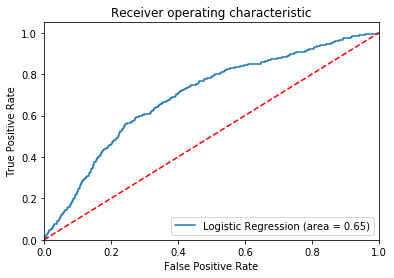

In [264]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 5) Decision Tree

In [249]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train_res, y_train_res.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [250]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=100, splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [253]:
DT_pred = clf_gini.predict(X_test) 
print("Predicted values:") 
print(DT_pred) 
    

Predicted values:
[0 1 0 ... 0 1 0]


In [252]:
#predictions_DT = clf_gini.predict(X_test)

In [254]:
confusion_matrix1 = confusion_matrix(y_test,DT_pred)
print(confusion_matrix1)

[[7389 1529]
 [ 182  285]]


In [255]:
accuracy_score(y_test, DT_pred)

0.817687799680341

In [256]:
print(classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.98      0.83      0.90      8918
           1       0.16      0.61      0.25       467

   micro avg       0.82      0.82      0.82      9385
   macro avg       0.57      0.72      0.57      9385
weighted avg       0.94      0.82      0.86      9385



In [257]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,
 max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train_res, y_train_res.ravel())

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [258]:
predictions_DTE = clf_entropy.predict(X_test)
# Calculate the absolute errors
#print("Accuracy for Decision Tree Model: %.2f" % (accuracy_score(y_test, predictions_DTE) * 100))

In [259]:
confusion_matrix1 = confusion_matrix(y_test,predictions_DTE)
print(confusion_matrix1)

[[7337 1581]
 [ 172  295]]


In [262]:
accuracy_score(y_test, predictions_DTE)

0.8132125732551945

In [263]:
print(classification_report(y_test, predictions_DTE))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89      8918
           1       0.16      0.63      0.25       467

   micro avg       0.81      0.81      0.81      9385
   macro avg       0.57      0.73      0.57      9385
weighted avg       0.94      0.81      0.86      9385



## 6) Random Forest

In [80]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train_res, y_train_res.ravel());

* Predict Random forest model

In [81]:
# Use the forest's predict method on the test data
RF_pred = rf.predict(X_test)
# Calculate the absolute errors
#print("Accuracy for Random Forest Model: %.2f" % (accuracy_score(y_test, predictions) * 100))

In [82]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test,RF_pred)
print(confusion_matrix1)

[[8741  177]
 [ 284  183]]


In [83]:
accuracy_score(y_test, RF_pred)

0.9508790623335109

In [84]:
print(classification_report(y_test, RF_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      8918
           1       0.51      0.39      0.44       467

   micro avg       0.95      0.95      0.95      9385
   macro avg       0.74      0.69      0.71      9385
weighted avg       0.95      0.95      0.95      9385



## 7 ) XgBoost

In [85]:
import xgboost as xgb

from xgboost import XGBClassifier 



In [86]:
xg_Clas = xgb.XGBClassifier(learning_rate =0.7,
 n_estimators=1000,
 max_depth=4,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

xg_Clas.fit(X_train_res, y_train_res.ravel())


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.7, max_delta_step=0,
       max_depth=4, min_child_weight=6, missing=None, n_estimators=1000,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27, silent=True,
       subsample=0.8)

* PredictXGBoost X_train= os_data_X

In [87]:
preds_xgb = xg_Clas.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix1 = confusion_matrix(y_test,preds_xgb)
print(confusion_matrix1)

[[8779  139]
 [ 211  256]]


In [89]:
accuracy_score(y_test, preds_xgb)

0.9627064464571125

### F1 Score

In [90]:
print(classification_report(y_test, preds_xgb))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8918
           1       0.65      0.55      0.59       467

   micro avg       0.96      0.96      0.96      9385
   macro avg       0.81      0.77      0.79      9385
weighted avg       0.96      0.96      0.96      9385



#### Important feature using XGBoost

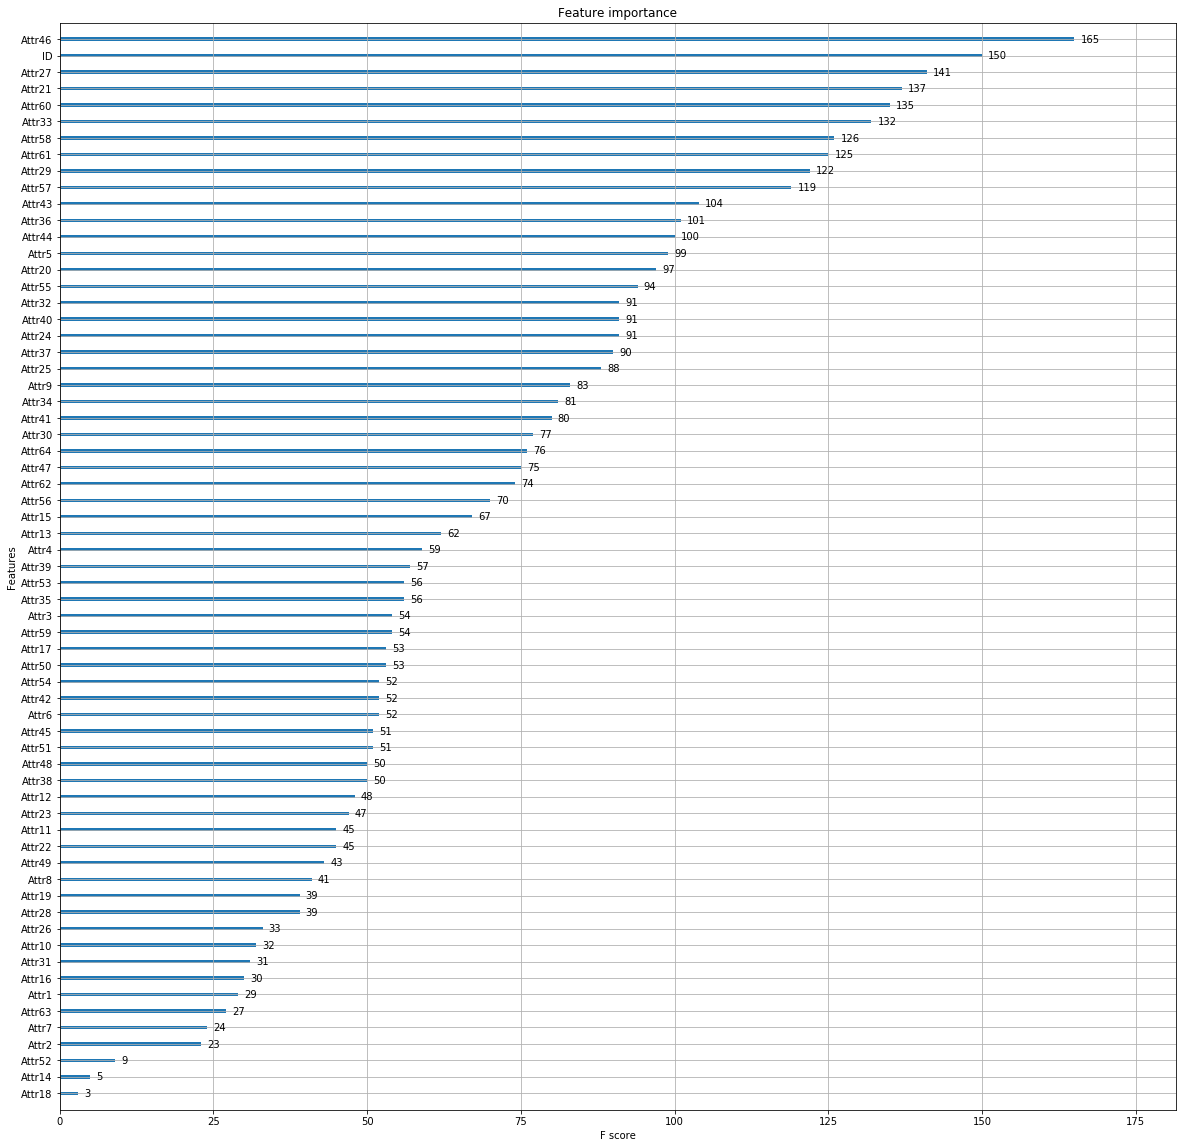

In [46]:
xgb.plot_importance(xg_Clas)
plt.rcParams['figure.figsize'] = [30, 30]
plt.show()

## 8) Gradient GBM Classifier

In [101]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
clf = GradientBoostingClassifier(n_estimators=50,learning_rate=0.3, max_features=2, max_depth = 2, random_state = 0)
clf.fit(X_train_res, y_train_res.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.3, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [103]:
preds_gbc = clf.predict(X_test)

In [104]:
confusion_matrix1 = confusion_matrix(y_test,preds_gbc)
print(confusion_matrix1)

[[7129 1789]
 [ 170  297]]


In [105]:
accuracy_score(y_test, preds_gbc)

0.791262653169952

In [106]:
print(classification_report(y_test, preds_gbc))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      8918
           1       0.14      0.64      0.23       467

   micro avg       0.79      0.79      0.79      9385
   macro avg       0.56      0.72      0.56      9385
weighted avg       0.94      0.79      0.85      9385



###  Important Features using GBM Classifier

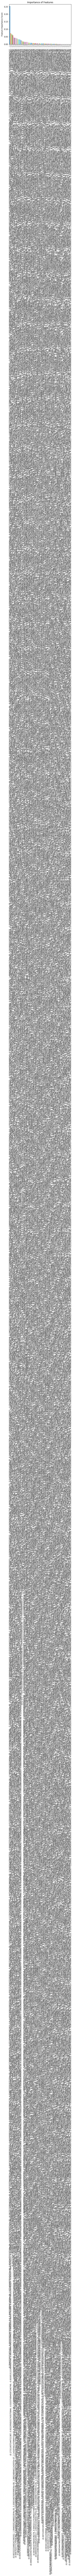

In [50]:
from sklearn.metrics import confusion_matrix
predictors=list(X_train_res)
feat_imp = pd.Series(clf.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
plt.rcParams['figure.figsize'] = [30, 30]

plt.show()

In [52]:
from sklearn.model_selection import GridSearchCV



In [ ]:
Grid_gbc = GradientBoostingClassifier(warm_start=True,max_features='sqrt') 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5,10,15,20],
           "learning_rate" : [0.1,0.5,0.9],
           "min_samples_split":[2,5,7,12,15],
           "n_estimators":[100,200,300,400]
           }
 
CV_GBM = GridSearchCV(estimator=Grid_gbc, param_grid=param_grid, cv= 3,verbose=1)
CV_GBM.fit(X_train_res, y_train_res.ravel())
print (CV_GBM.best_score_, CV_GBM.best_params_)

# Regularization

In [56]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet



In [78]:
Rid_Reg = Ridge()
lasso_Reg = Lasso(alpha=1.00)
EN_Reg = ElasticNet(alpha=0.5) 
Rid_Reg.fit(X_train_res, y_train_res.ravel())
lasso_Reg.fit(X_train_res, y_train_res.ravel())
EN_Reg.fit(X_train_res, y_train_res.ravel())

ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
print("R2 for Ridge")
np.round(Rid_Reg.score(X_test,y_test)*100,2)

R2 for Ridge


-355.7

In [80]:
Rid_Reg_pred = Rid_Reg.predict(X_test)
lasso_Reg_pred =lasso_Reg.predict(X_test)

EN_Reg_pred =EN_Reg.predict(X_test)



In [64]:
 from sklearn import metrics

In [81]:
print("MSE for Ridge")
np.round(metrics.mean_squared_error(y_test,Rid_Reg_pred),2)

MSE for Ridge


0.22

In [82]:
print("MSE for Lasso")
np.round(metrics.mean_squared_error(y_test,lasso_Reg_pred),2)

MSE for Lasso


0.25

In [ ]:
print("MSE for Elastic Net")
np.round(metrics.mean_squared_error(y_test,EN_Reg_pred),2)

## Compute precision, recall, F-measure and support


* The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

* The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

* The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

* The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

* The support is the number of occurrences of each class in y_test.


## Voting Ensemble for Classification


In [31]:
from sklearn.ensemble import VotingClassifier


In [33]:
kfold = model_selection.KFold(n_splits=10, random_state=seed)
# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
#model3 = SVC()
#estimators.append(('svm', model3))
# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, , cv=kfold)
print(results.mean())





/Users/priyavivekbhandarkar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyavivekbhandarkar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/priyavivekbhandarkar/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/priyavivekbhandarkar/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

0.9527538459212108


In [119]:
sub_predictions = logreg.predict(Test_Bankrupts[['ID', 'Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr18', 'Attr19', 'Attr20', 'Attr22', 'Attr23', 'Attr24',
       'Attr25', 'Attr26', 'Attr27', 'Attr29', 'Attr30', 'Attr31', 'Attr32',
       'Attr33', 'Attr34', 'Attr35', 'Attr36', 'Attr38', 'Attr39', 'Attr40',
       'Attr41', 'Attr42', 'Attr43', 'Attr44', 'Attr45', 'Attr46', 'Attr47',
       'Attr48', 'Attr49', 'Attr50', 'Attr51', 'Attr52', 'Attr53', 'Attr54',
       'Attr55', 'Attr56', 'Attr57', 'Attr58', 'Attr59', 'Attr60', 'Attr61',
       'Attr62', 'Attr63', 'Attr64']])


In [120]:
submission = pd.DataFrame({ 'ID': Test_Bankrupts['ID'], 'target': sub_predictions })

filename = 'Priya_python36_logreg.csv'
submission.to_csv(filename,index=False)



In [121]:
print('Saved file: ' + filename)

Saved file: Priya_python36_logreg.csv


In [122]:
submission.head()

ID  target
0  36554       0
1  36555       0
2  36556       0
3  36557       0
4  36558       0

In [123]:
submission.tail()

ID  target
6446  43000       0
6447  43001       0
6448  43002       1
6449  43003       0
6450  43004       0